In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv("Car_Price.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Step 1: Reading and Understanding the Data

Let's start with the following steps:

   1. Importing data using the pandas library

   2. Understanding the structure of the data

In [3]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
cars.shape

(205, 26)

In [6]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Step 2 : Data Cleaning and Preparation

In [8]:
#Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x:x.split(' ')[0])
CompanyName.head(10)

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
5           audi
6           audi
7           audi
8           audi
9           audi
Name: CarName, dtype: object

In [9]:
#Insert CompanyName in dataset
cars.insert(3,'CompanyName',CompanyName)
cars

,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [10]:
#dropping the CarName from dataset
cars.drop(['CarName'],axis=1,inplace = True)

In [11]:
cars.head(10)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [12]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)


# Fixing invalid values
There seems to be some spelling error in the CompanyName column.

    1 maxda = mazda
    2 Nissan = nissan
    3 porsche = porcshce
    4 toyota = toyouta
    5 vokswagen = volkswagen = vw

In [13]:
cars.CompanyName = cars.CompanyName.str.lower()
def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)
replace_name('maxda','mazda')
replace_name('Nissan','nissan')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
#Checking for duplicates
cars.duplicated().value_counts()

False    205
dtype: int64

In [15]:
#cars.loc[cars.diplicated()]

In [16]:
print(cars.columns)
print("Total no of Columns:",cars.columns.shape)

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
Total no of Columns: (26,)


In [17]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CompanyName       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [18]:
cars.head(3).T

,0,1,2
car_ID,1,2,3
symboling,3,3,1
CompanyName,alfa-romero,alfa-romero,alfa-romero
fueltype,gas,gas,gas
aspiration,std,std,std
doornumber,two,two,two
carbody,convertible,convertible,hatchback
drivewheel,rwd,rwd,rwd
enginelocation,front,front,front
wheelbase,88.6,88.6,94.5


# Step 3: Visualizing the data

C:\Users\admin\AppData\Local\Temp\ipykernel_17236\1297256859.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars.price)


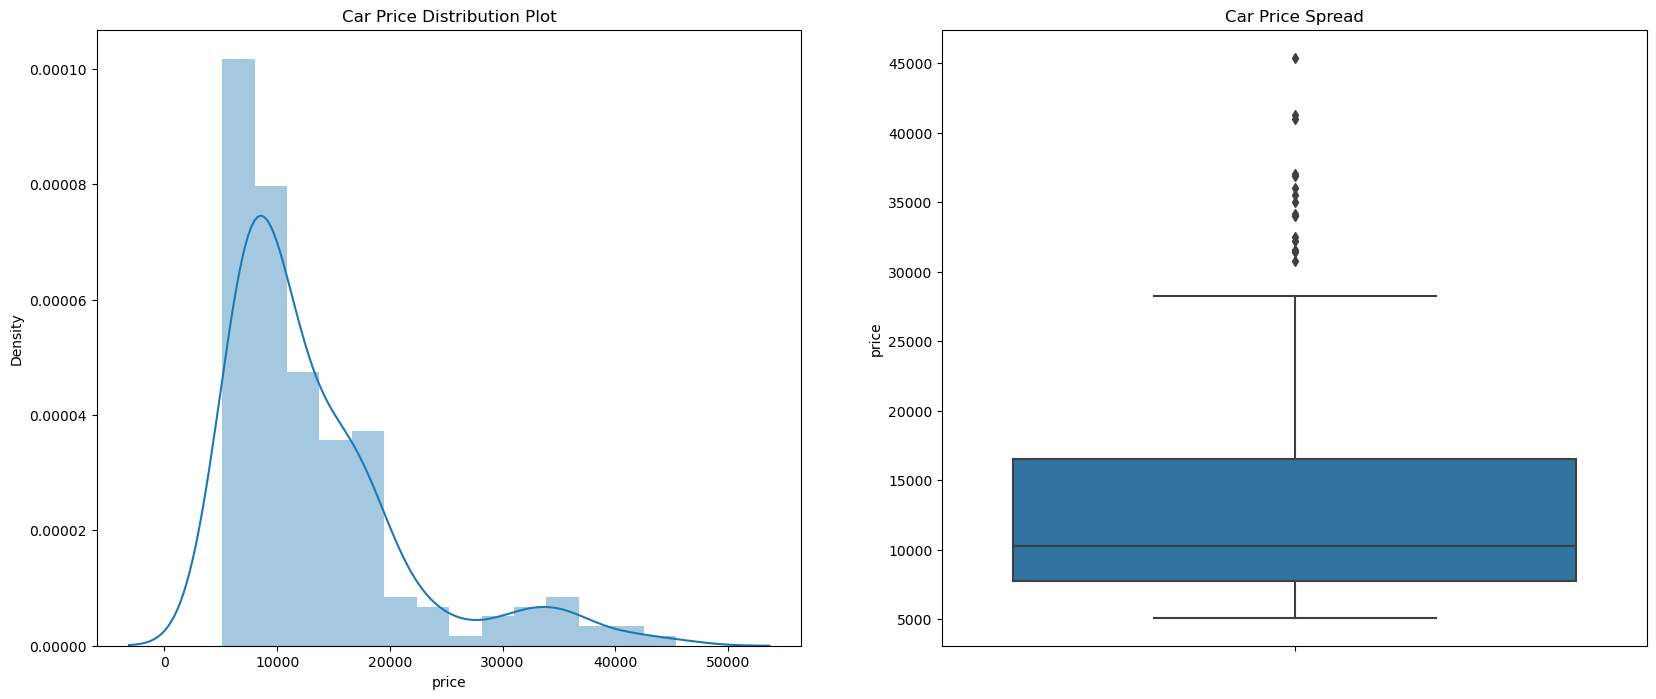

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [20]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


# Inference :
    1.The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
    2.There is a significant difference between the mean and the median of the price distribution.
    3.The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

# Step 3.1 : Visualising Categorical Data

In [21]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CompanyName       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [22]:
#Extracting the object columns
object_columns = list(cars.select_dtypes(include=['object']).columns)
object_columns

['CompanyName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

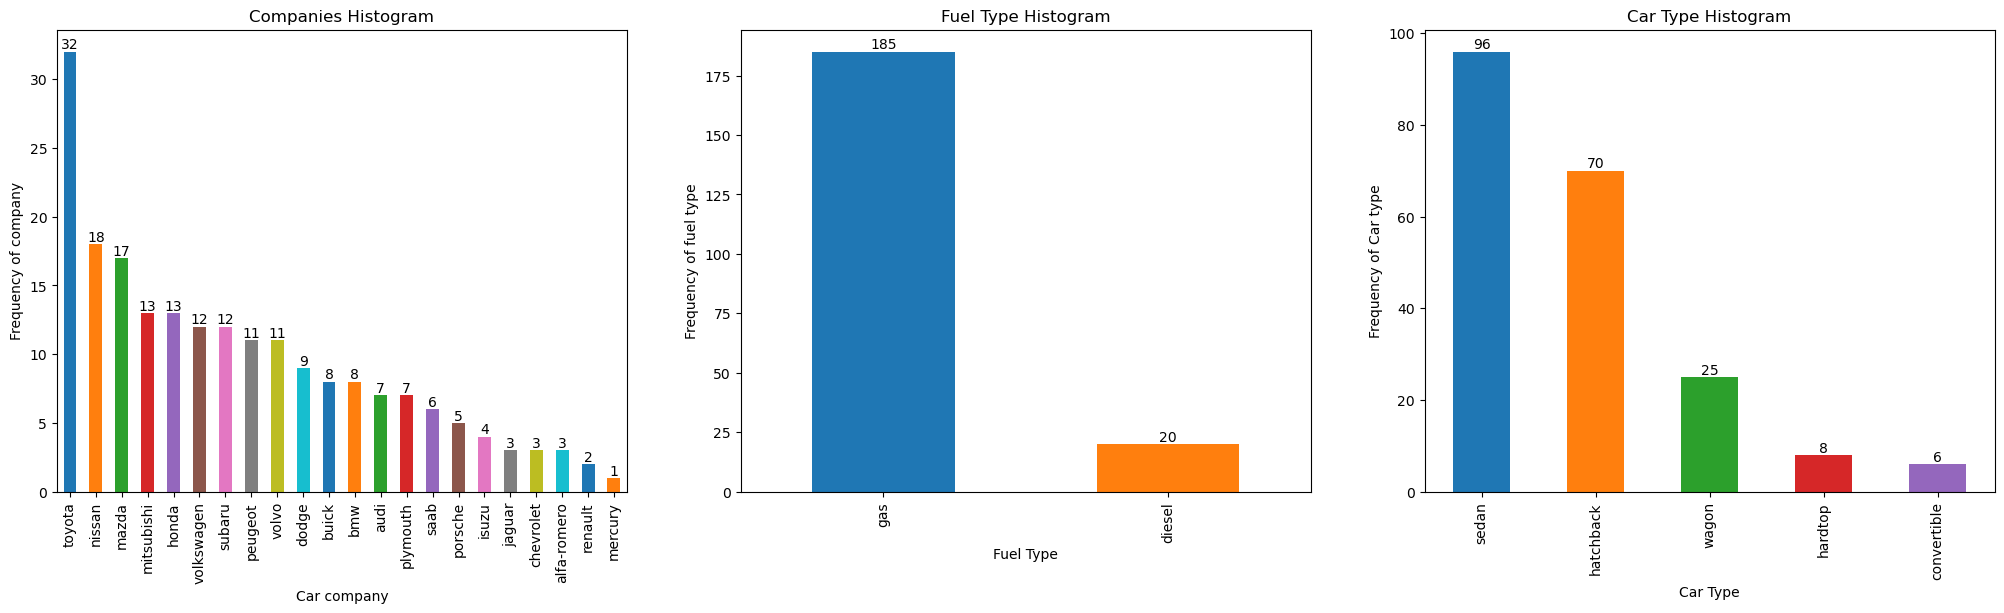

In [23]:
# Set a colorful palette
colors = sns.color_palette()

plt.figure(figsize=(25, 6))

plt.subplot(1, 3, 1)
plt1 = cars.CompanyName.value_counts().plot(kind='bar', color=colors)
plt.title('Companies Histogram')
plt1.set(xlabel='Car company', ylabel='Frequency of company')

# Add data labels to the bars
for i, v in enumerate(cars.CompanyName.value_counts()):
    plt1.text(i, v, str(v), ha='center', va='bottom')

plt.subplot(1, 3, 2)
plt1 = cars.fueltype.value_counts().plot(kind='bar', color=colors)
plt.title('Fuel Type Histogram')
plt1.set(xlabel='Fuel Type', ylabel='Frequency of fuel type')

# Add data labels to the bars
for i, v in enumerate(cars.fueltype.value_counts()):
    plt1.text(i, v, str(v), ha='center', va='bottom')

plt.subplot(1, 3, 3)
plt1 = cars.carbody.value_counts().plot(kind='bar', color=colors)
plt.title('Car Type Histogram')
plt1.set(xlabel='Car Type', ylabel='Frequency of Car type')

# Add data labels to the bars
for i, v in enumerate(cars.carbody.value_counts()):
    plt1.text(i, v, str(v), ha='center', va='bottom')

plt.show()


# Inference :
1. Toyota seemed to be favoured car company.
2. Number of gas fueled cars are more than diesel.
3. sedan is the top car type prefered & convertable is the least car type prefered

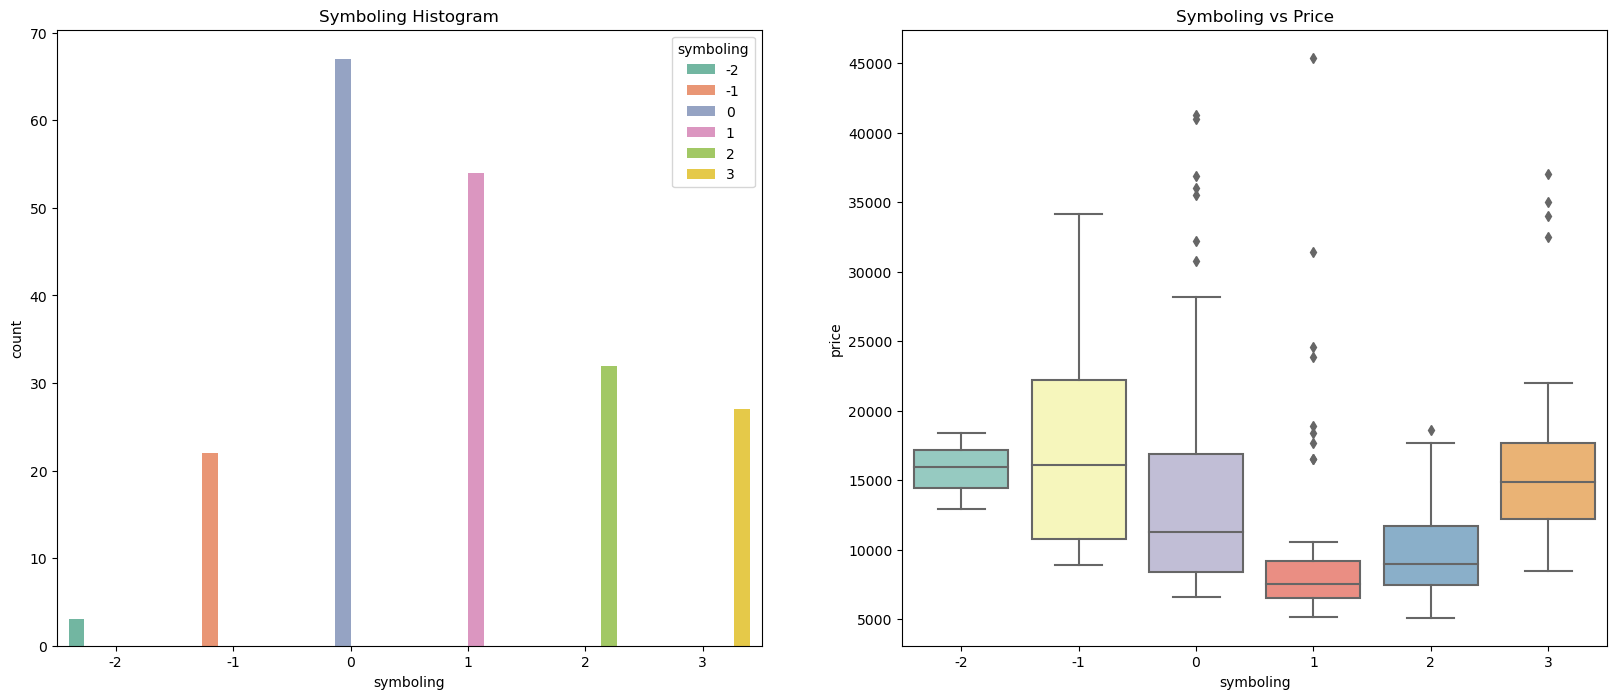

In [24]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.title('Symboling Histogram')
sns.countplot(data=cars, x='symboling', hue='symboling', palette='Set2')

plt.subplot(1, 2, 2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette='Set3')

plt.show()


In [25]:
cars.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


# Inference :
1. It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
2. The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

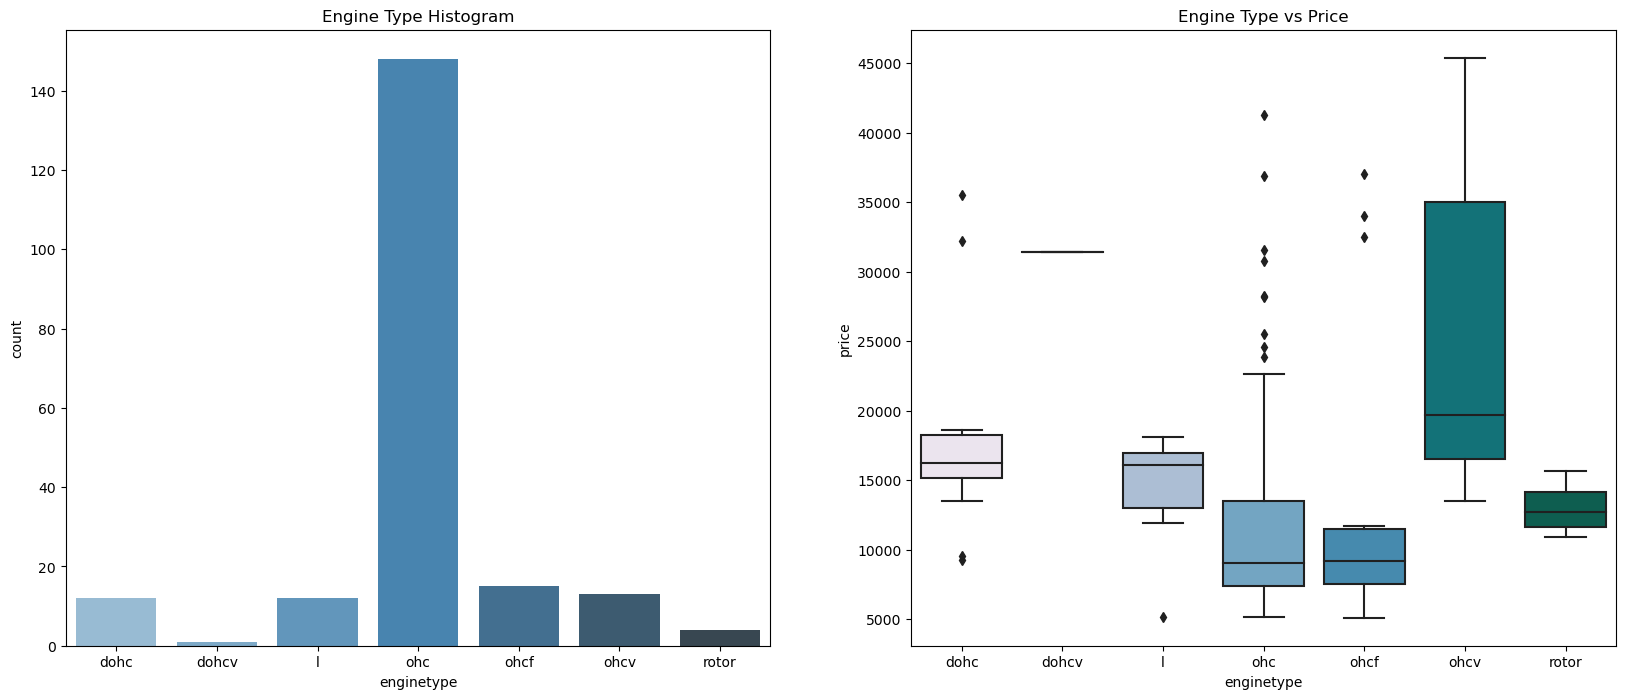

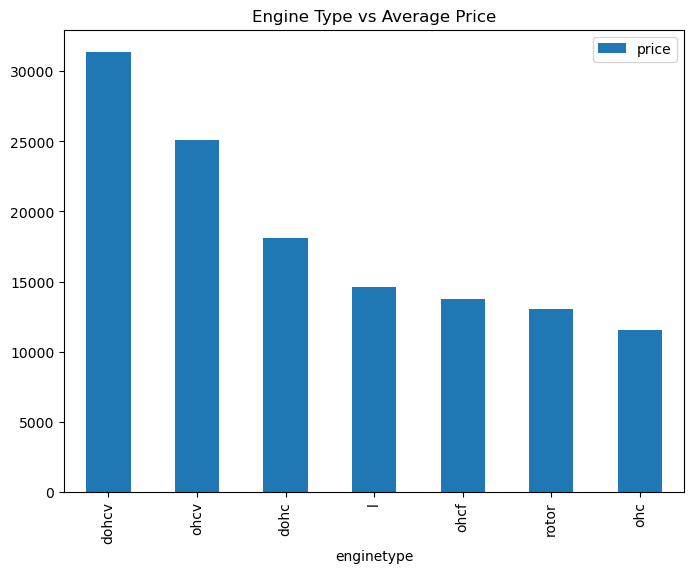

In [26]:
# Convert 'enginetype' to categorical data type
cars['enginetype'] = pd.Categorical(cars['enginetype'])

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.title('Engine Type Histogram')
sns.countplot(data=cars, x='enginetype', palette='Blues_d')

plt.subplot(1, 2, 2)
plt.title('Engine Type vs Price')
sns.boxplot(data=cars, x='enginetype', y='price', palette='PuBuGn')

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending=False))
df.plot.bar(figsize=(8, 6))
plt.title('Engine Type vs Average Price')
plt.show()


# Inference :
1. ohc Engine type seems to be most favored type.
2. 
    i) ohcv has the highest price range (While dohcv has only one row)
    ii)ohc and ohcf have the low price range.

<Figure size 2500x600 with 0 Axes>

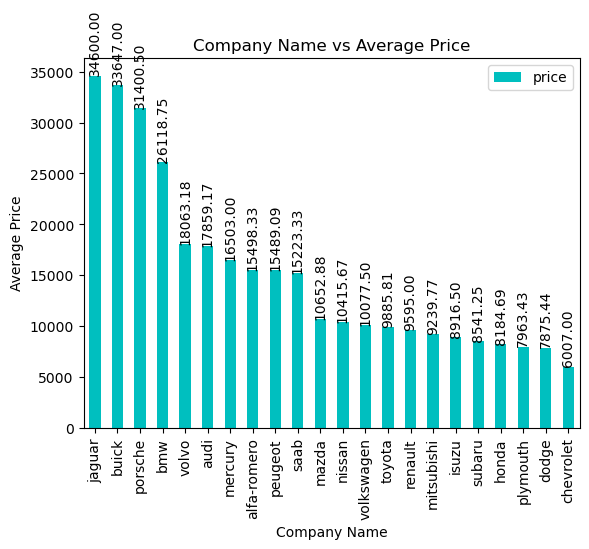

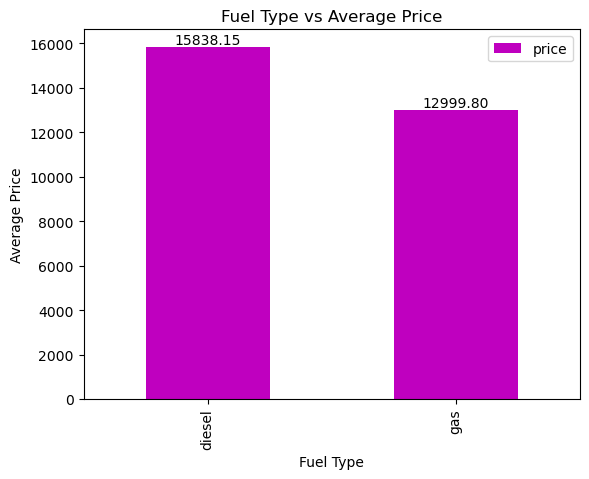

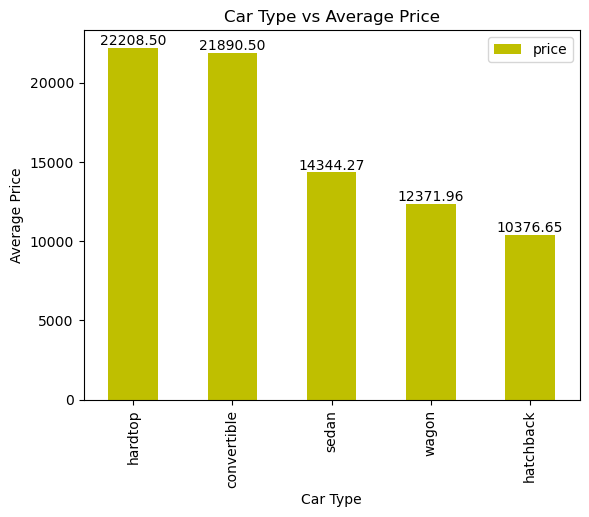

In [27]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending=False))
ax = df.plot.bar(color='c')
plt.title('Company Name vs Average Price')
plt.xlabel('Company Name')
plt.ylabel('Average Price')

# Add data labels to the bar plot
for i, v in enumerate(df['price']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom',rotation='vertical')

plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending=False))
ax = df.plot.bar(color='m')
plt.title('Fuel Type vs Average Price')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')

# Add data labels to the bar plot
for i, v in enumerate(df['price']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending=False))
ax = df.plot.bar(color='y')
plt.title('Car Type vs Average Price')
plt.xlabel('Car Type')
plt.ylabel('Average Price')

# Add data labels to the bar plot
for i, v in enumerate(df['price']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()


# Inference :
1. Jaguar and Buick seem to have highest average price.
2. diesel has higher average price than gas.
3. hardtop and convertible have higher average price.

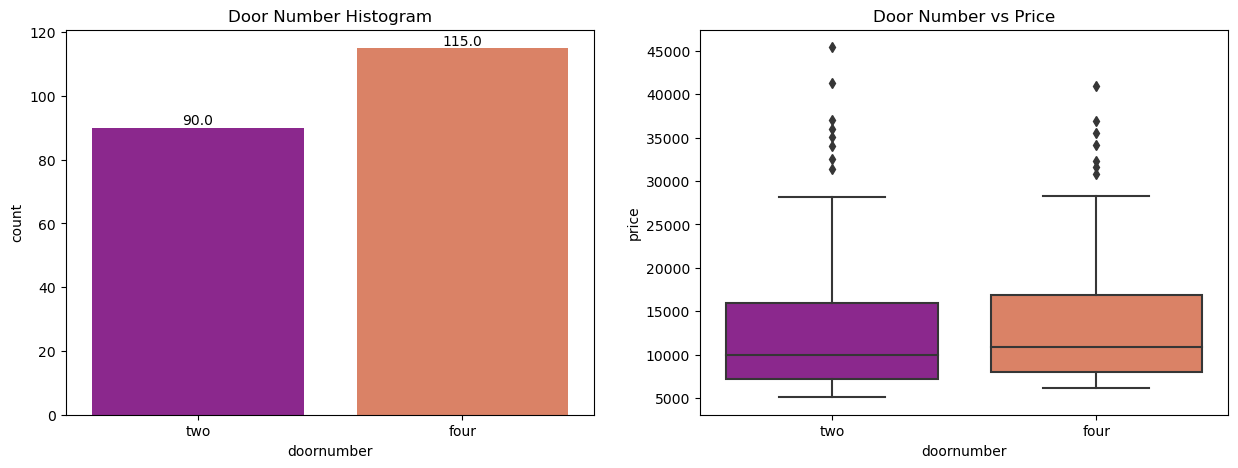

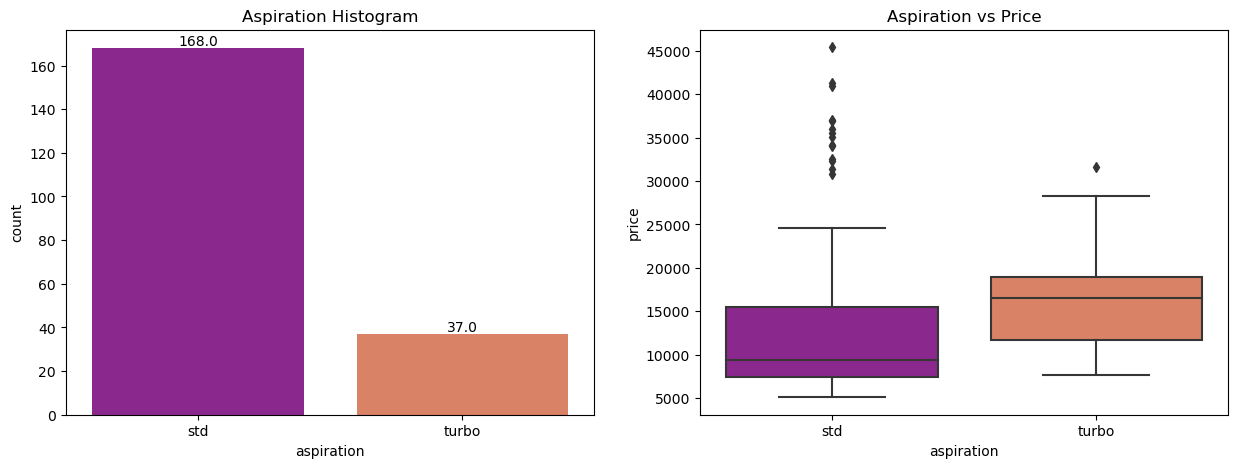

In [28]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Door Number Histogram')
sns.countplot(data=cars, x='doornumber', palette='plasma')

# Add data labels to the countplot
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.title('Door Number vs Price')
sns.boxplot(data=cars, x='doornumber', y='price', palette='plasma')

plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Aspiration Histogram')
sns.countplot(data=cars, x='aspiration', palette='plasma')

# Add data labels to the countplot
ax2 = plt.gca()
for p in ax2.patches:
    ax2.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.title('Aspiration vs Price')
sns.boxplot(data=cars, x='aspiration', y='price', palette='plasma')

plt.show()


# Inference :
1. doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
2. It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

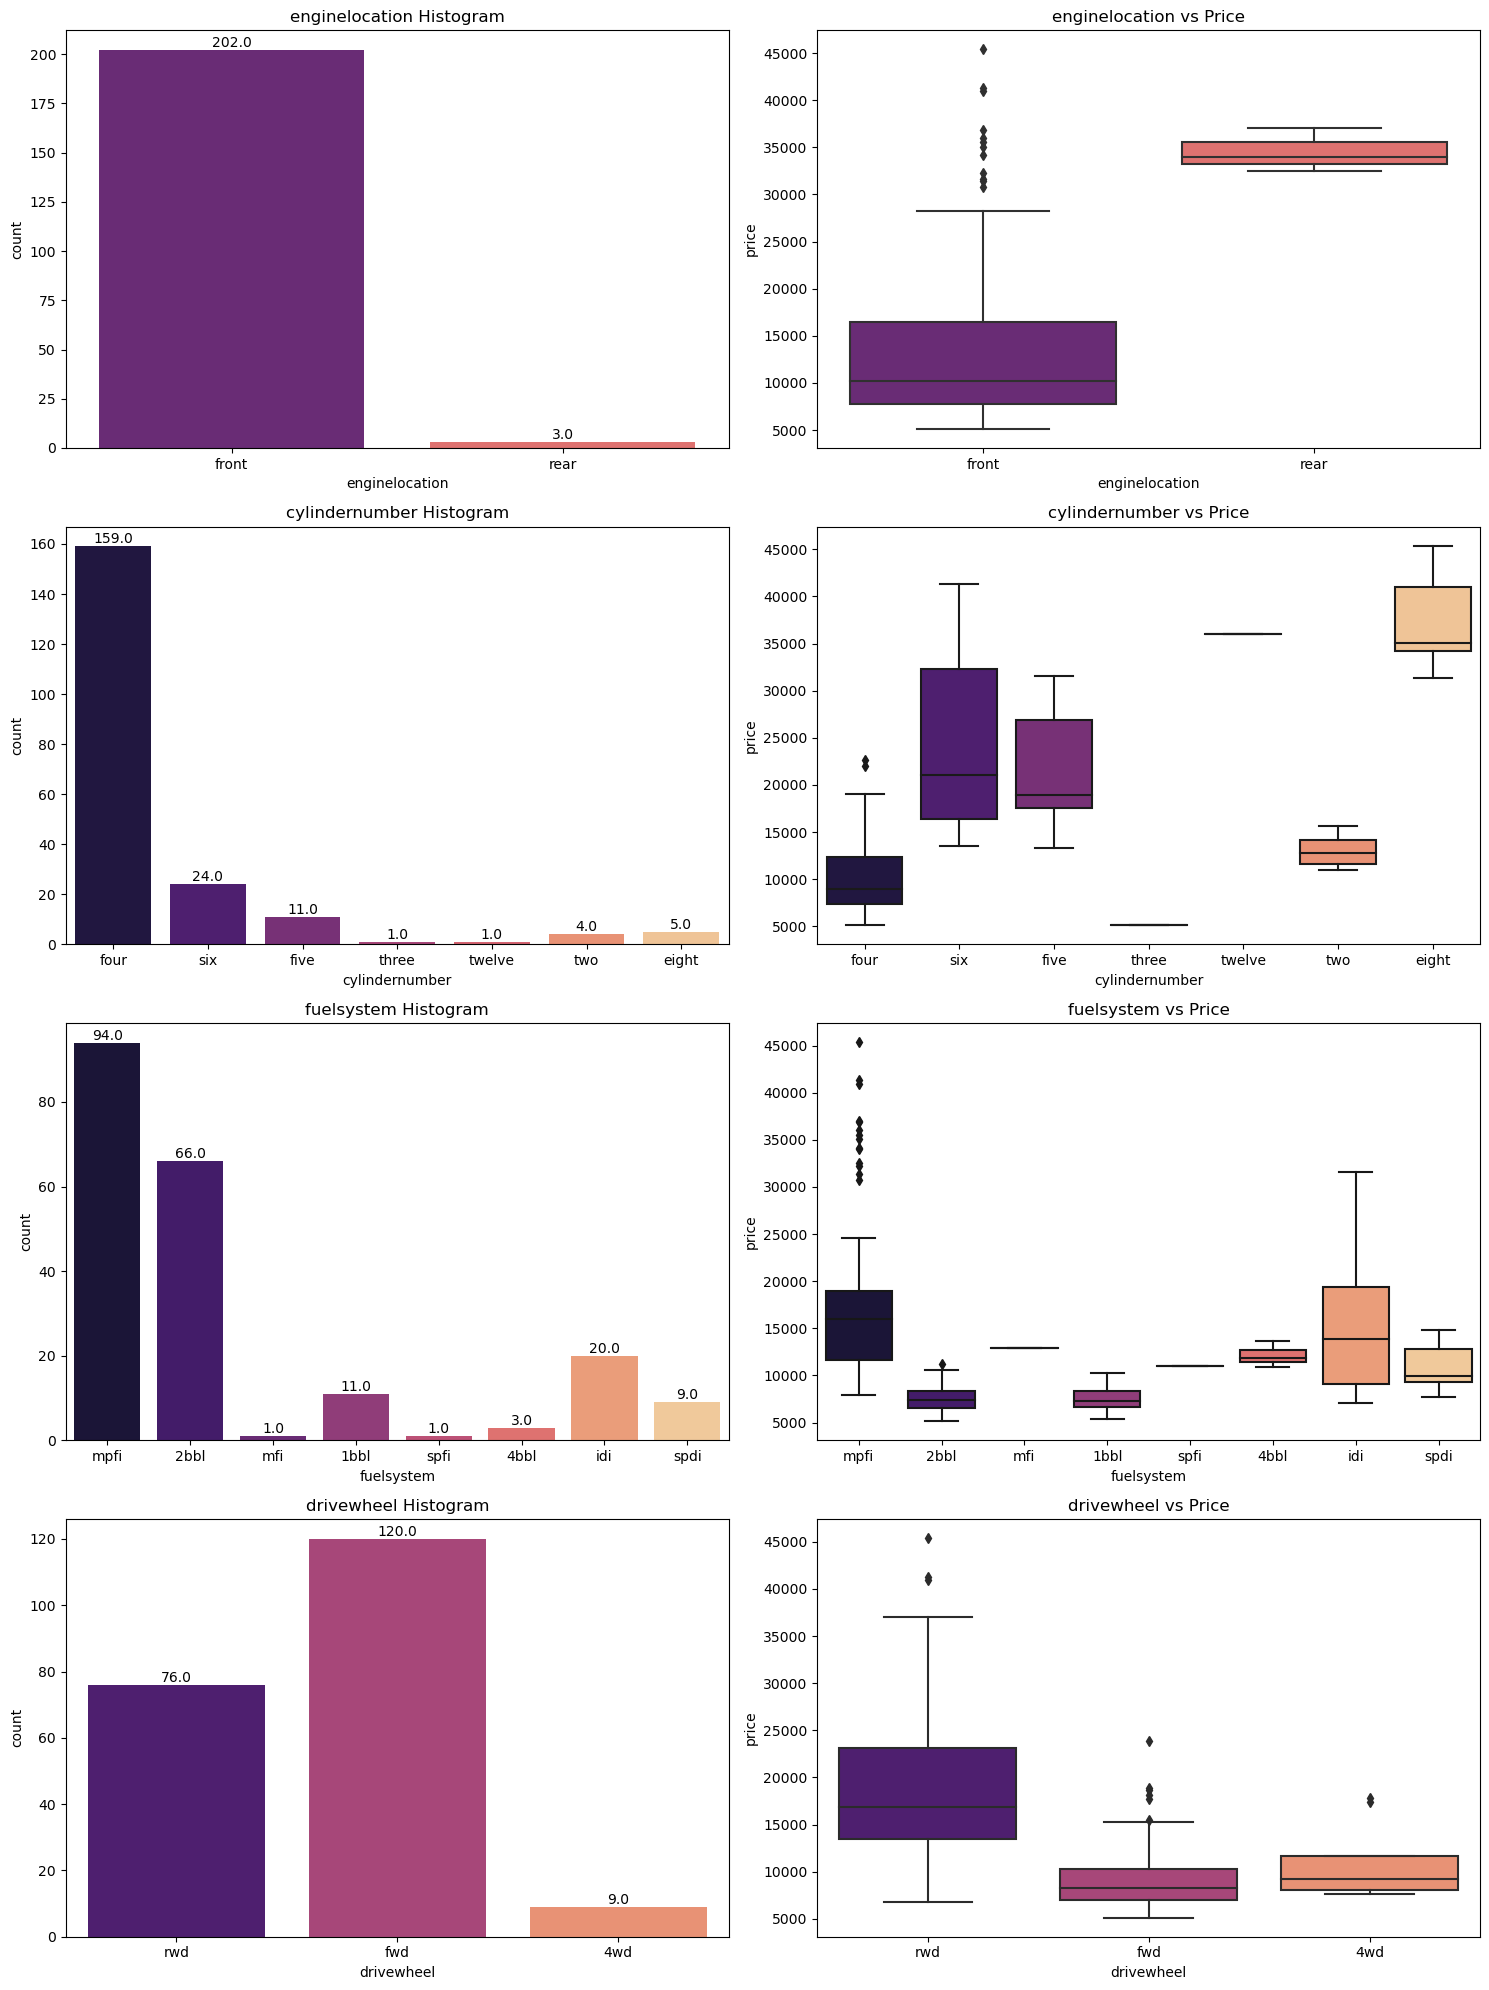

In [29]:
 def plot_count(x, fig):
    plt.subplot(4, 2, fig)
    plt.title(x + ' Histogram')
    ax1 = sns.countplot(data=cars, x=x, palette='magma')

    # Add data labels to the countplot
    for p in ax1.patches:
        ax1.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    plt.subplot(4, 2, (fig + 1))
    plt.title(x + ' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette='magma')

plt.figure(figsize=(15, 20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()
plt.show()


# Inference :
1. Very few datapoints for enginelocation categories to make an inference.
2. Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
3. mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
4. A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

# Step 3.2 : Visualising numerical data

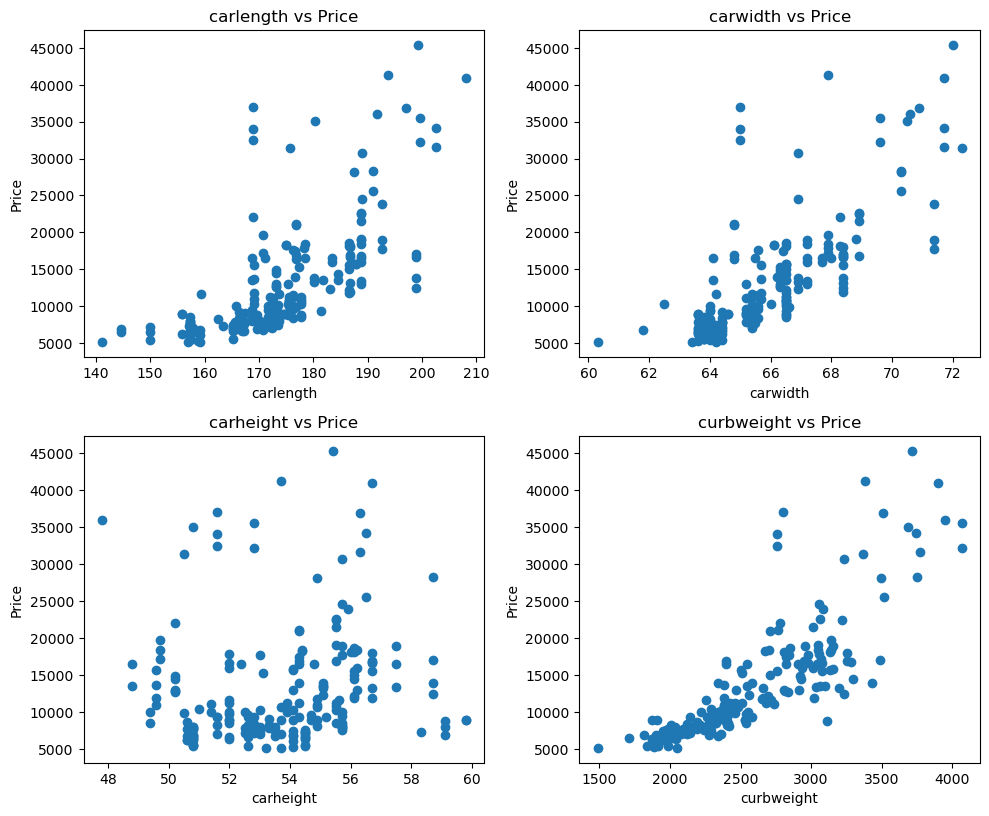

In [30]:
def scatter(x, fig):
    plt.subplot(5, 2, fig)
    plt.scatter(cars[x], cars['price'])
    plt.title(x + ' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

'''  
    # Add data labels to the scatter plot
    for i, j in zip(cars[x], cars['price']):
        plt.text(i, j, f'{j:.2f}', ha='center', va='bottom')
'''

plt.figure(figsize=(10, 20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()
plt.show()


# Inference :
1. carwidth, carlength and curbweight seems to have a poitive correlation with price.
2. carheight doesn't show any ignificant trend with price.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


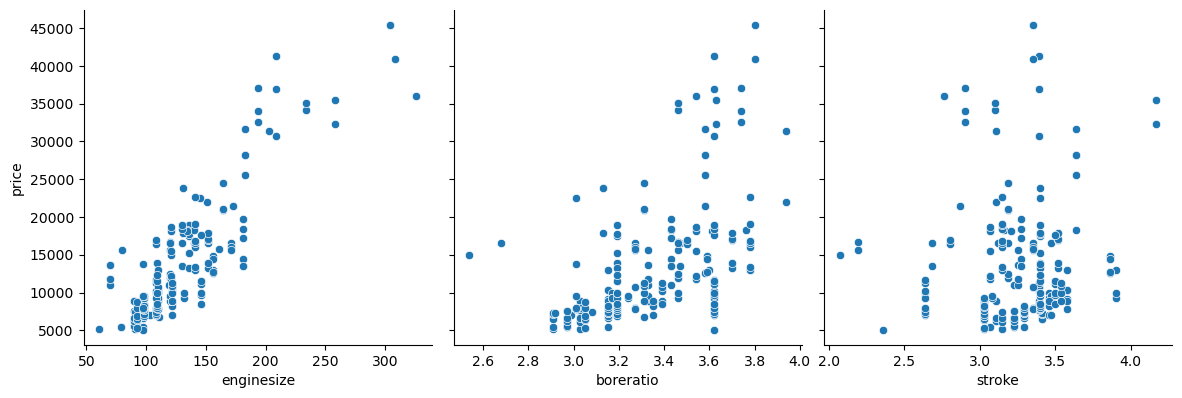

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


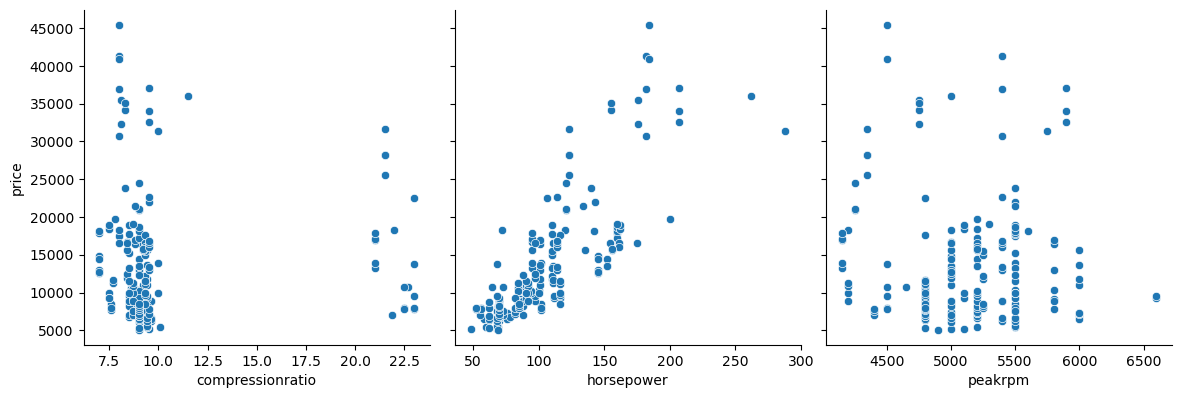

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


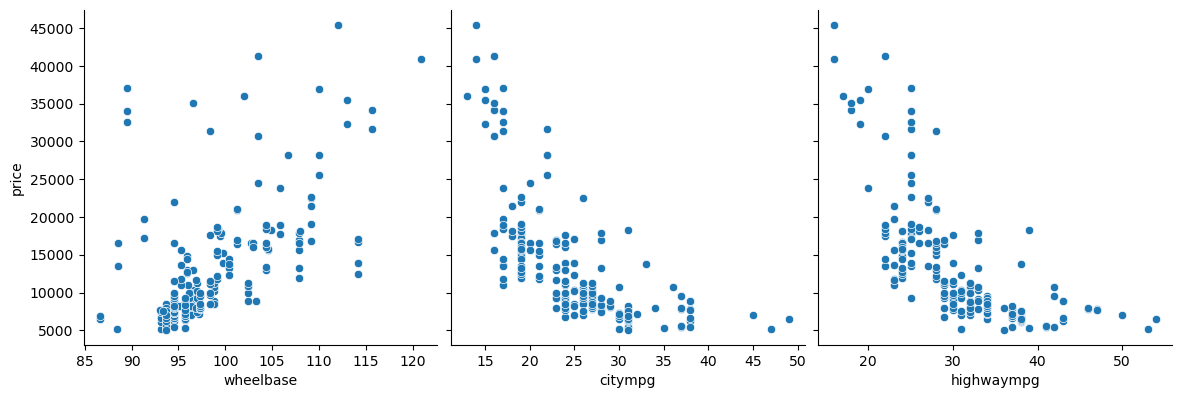

In [31]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

# Inference :
1. enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
2. citympg, highwaympg - seem to have a significant negative correlation with price.

In [32]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

0.841118268481846

# Inference
1. There is a strong positive linear relationship between car length and car width. A correlation coefficient of 0.8411 indicates a strong positive correlation, suggesting that as car length increases, car width tends to increase as well.

2. This inference implies that there is a tendency for longer cars to have wider widths. However, it is important to note that correlation does not imply causation, and there may be other factors influencing the relationship between car length and car width.

# Step 4 : Deriving new features

In [33]:
#Fuel economy
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])
cars['fueleconomy'].describe()

count    205.000000
mean      27.708780
std        6.649183
min       14.800000
25%       21.950000
50%       26.700000
75%       31.800000
max       51.250000
Name: fueleconomy, dtype: float64

In [34]:
#Binning the Car Companies based on avg prices of each Company.
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


# Step 5 : Bivariate Analysis

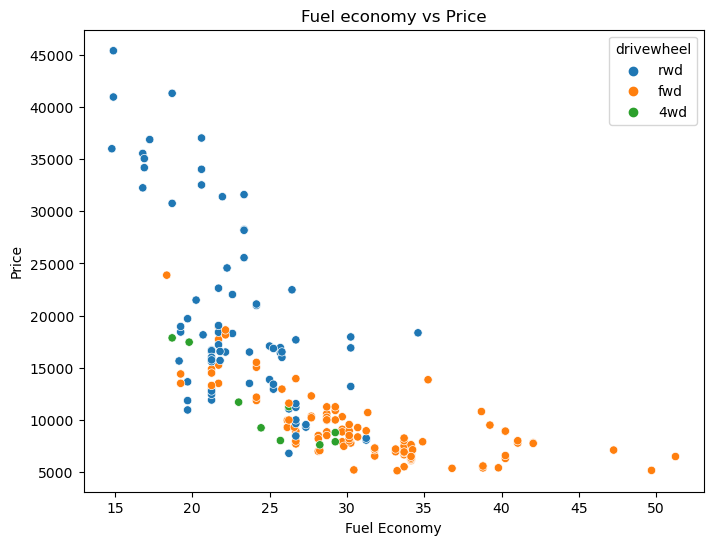

<Figure size 640x480 with 0 Axes>

In [35]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

# Inference :
fuel Eeconomy has an obvios negative correlation with price and is significant.

<Figure size 2500x600 with 0 Axes>

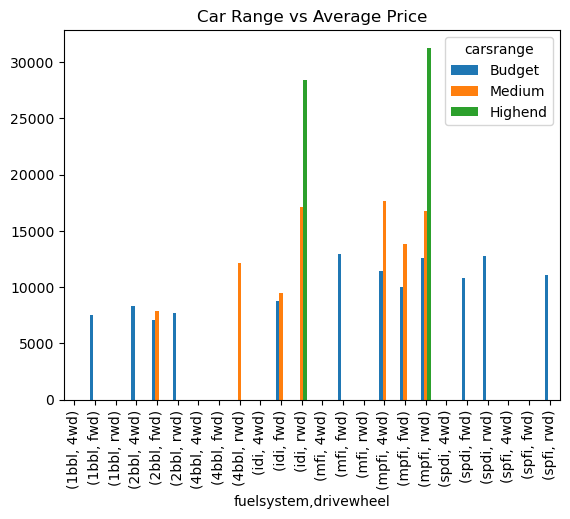

In [36]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

# Inference :
1. High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.

# List of significant variables after Visual analysis :
- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy

In [37]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


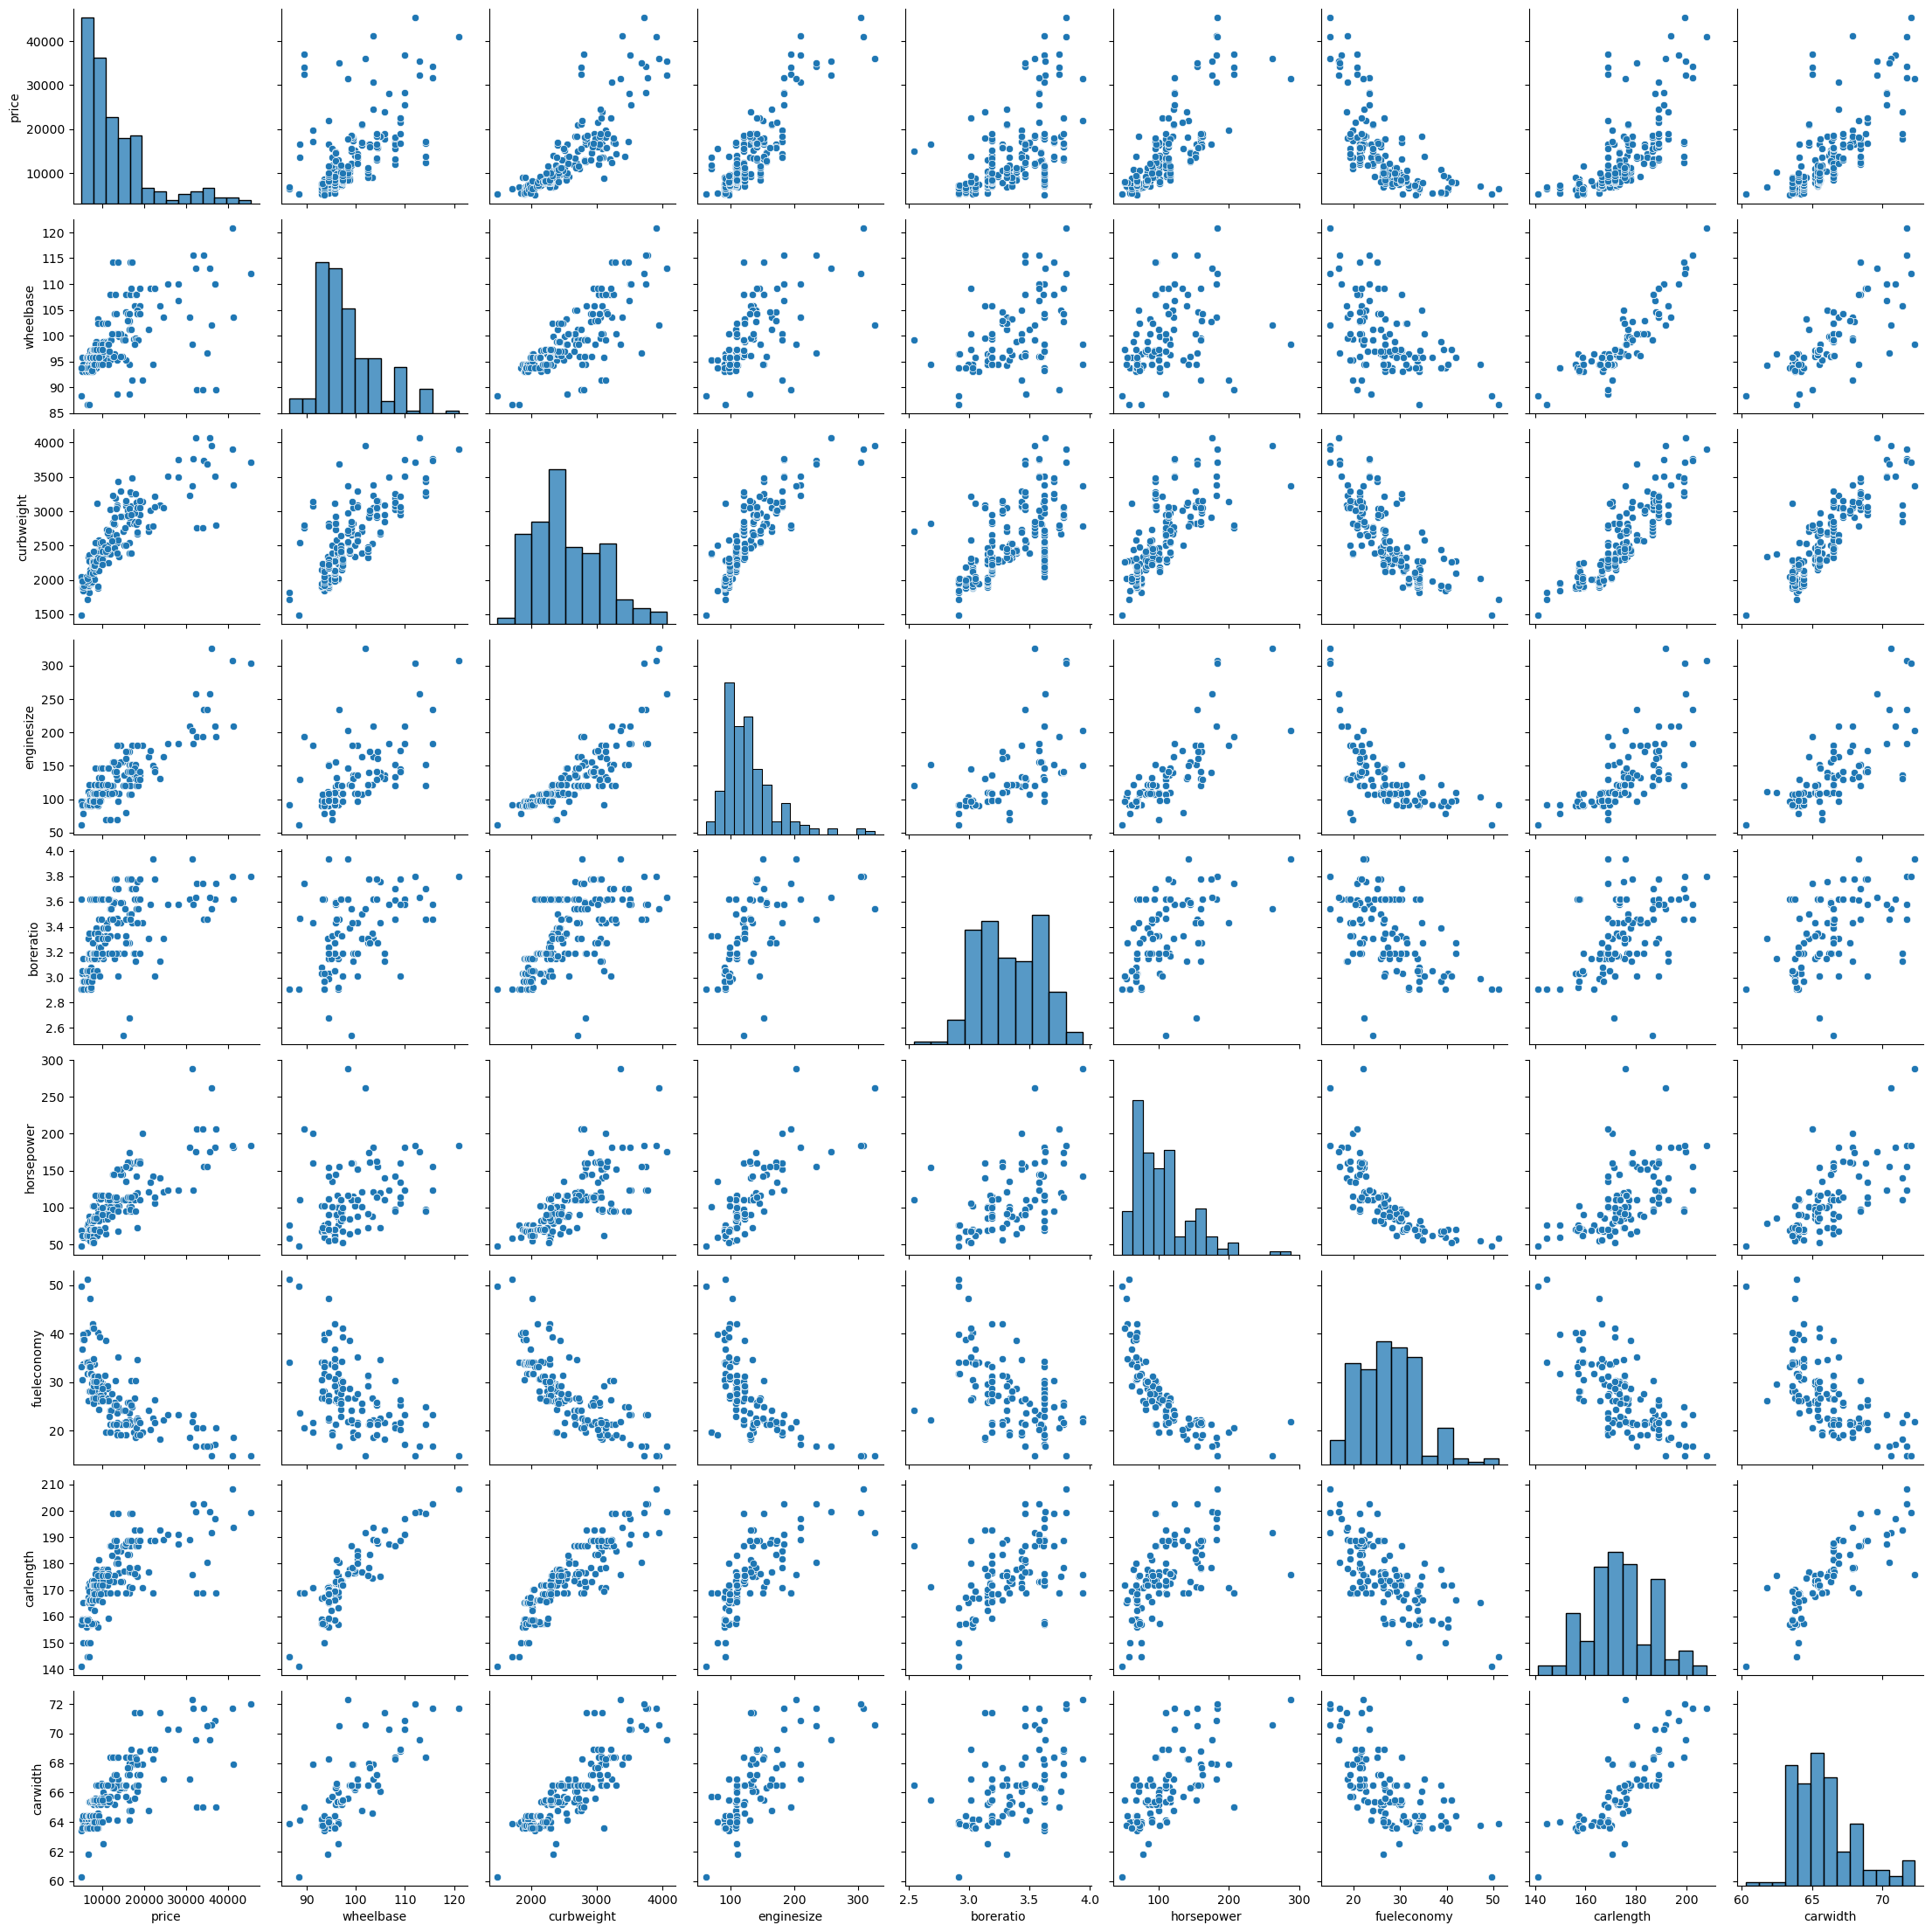

In [38]:
sns.pairplot(cars_lr)
plt.show()

# Step 6 : Dummy Variables

In [39]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [40]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [41]:
cars_lr.shape

(205, 31)

### Step 7 : Train-Test Split and feature scaling

In [42]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [44]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,...,0,0,0,1,0,0,0,0,1,0


In [45]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


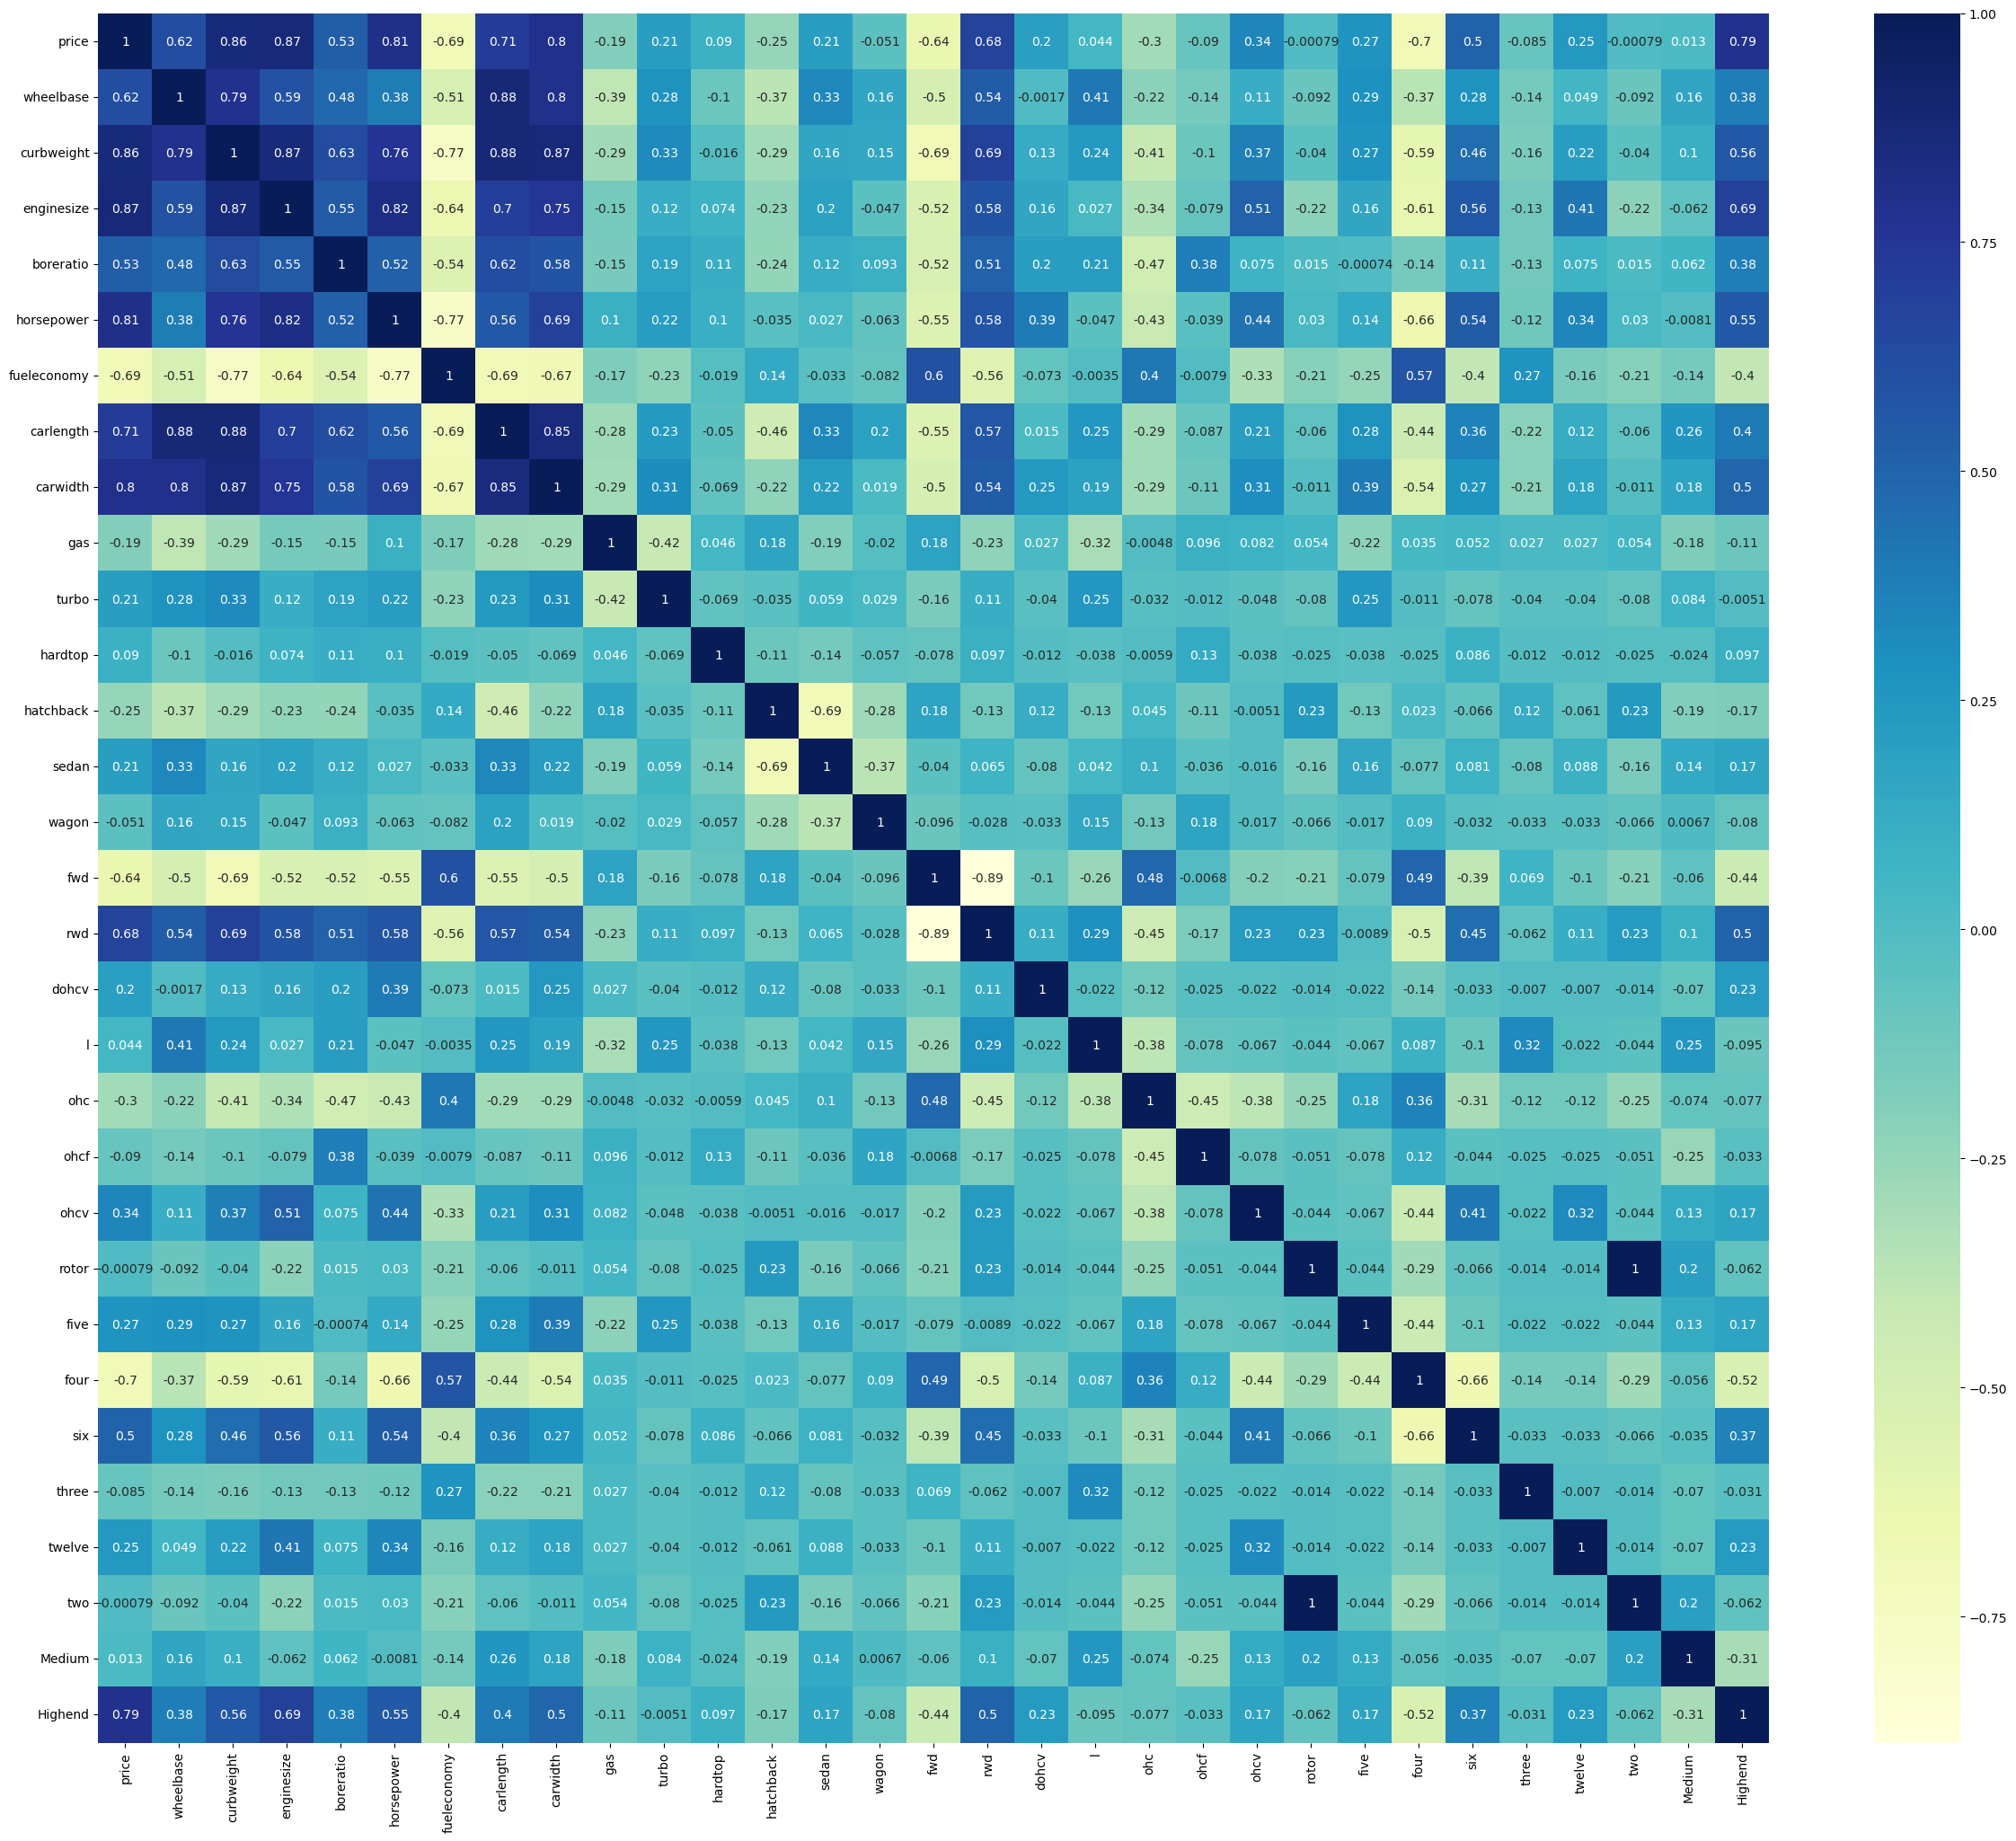

In [46]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Inference:
1. Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend.

In [47]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

### Step 8 : Model Building

In [48]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)
rfe.fit(X_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=10)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 21),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 20),
 ('Medium', False, 12),
 ('Highend', True, 1)]

In [51]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [52]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.344307,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,1,0,0,0


In [53]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### MODEL 1

In [54]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.29e-70
Time:                        14:03:19   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0947      0.042     -2.243      

In [55]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

### MODEL 2

In [56]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 24 May 2023   Prob (F-statistic):           4.25e-71
Time:                        14:03:20   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0764      0.041     -1.851      

In [57]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)

### MODEL 3

In [58]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Wed, 24 May 2023   Prob (F-statistic):           7.85e-72
Time:                        14:03:20   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [59]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,wagon,3.58
8,Highend,1.63
7,dohcv,1.46


In [60]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

### MODEL 4

In [61]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Wed, 24 May 2023   Prob (F-statistic):           4.70e-70
Time:                        14:03:21   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [62]:
checkVIF(X_train_new)

,Features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
7,Highend,1.56
6,dohcv,1.21


In [63]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

### MODEL 5

In [64]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.68e-69
Time:                        14:03:21   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [65]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.82
1,horsepower,2.39
2,carwidth,2.09
6,Highend,1.55
3,hatchback,1.23
5,dohcv,1.21
4,wagon,1.11


In [66]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

### MODEL 6

In [67]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.57e-70
Time:                        14:03:21   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [68]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
5,Highend,1.53
4,dohcv,1.21
3,hatchback,1.13


### MODEL 7

In [69]:
#Dropping dohcv to see the changes in model statistics
X_train_new = X_train_new.drop(["dohcv"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.04e-67
Time:                        14:03:22   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

,Features,VIF
0,const,10.04
1,horsepower,2.22
2,carwidth,2.08
4,Highend,1.53
3,hatchback,1.10


# Step 9 : Residual Analysis of Model

In [70]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

C:\Users\admin\AppData\Local\Temp\ipykernel_17236\3525433637.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)


Text(0.5, 0, 'Errors')

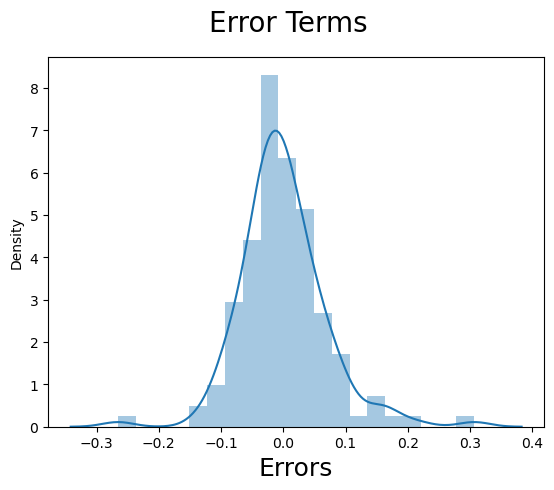

In [71]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled

### Step 10 : Prediction and Evaluation

In [72]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [73]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [74]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [75]:
# Making predictions
y_pred = lm.predict(X_test_new)

Evaluation of test via comparison of y_pred and y_test

In [76]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8614595209022033

Text(0, 0.5, 'y_pred')

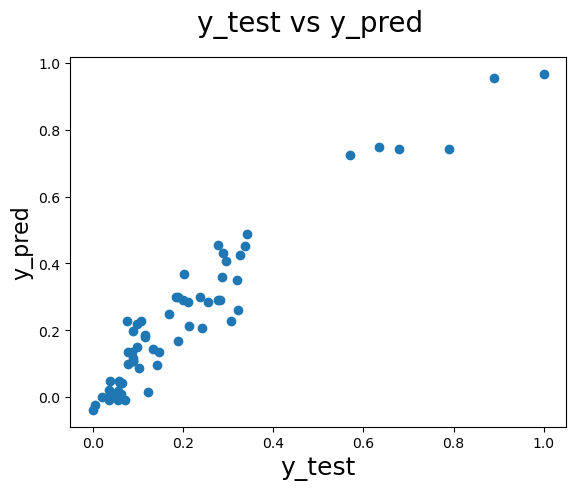

In [77]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

Evaluation of the model using Statistics

In [78]:
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.04e-67
Time:                        14:03:23   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

# Inference :
1. R-sqaured and Adjusted R-squared (extent of fit) - 0.899 and 0.896 - 90% variance explained.
2. F-stats and Prob(F-stats) (overall model fit) - 308.0 and 1.04e-67(approx. 0.0) - Model fir is significant and explained 90% variance is just not by chance.
3. p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

## From the above OLS Regression Results summary, we can draw the following inferences:

1.  R-squared: The R-squared value is 0.899, which indicates that approximately 89.9% of the variance in the target variable (price) is explained by the independent variables included in the model. A higher R-squared value suggests a better fit of the model to the data.

2. Adj. R-squared: The adjusted R-squared value is 0.896, which takes into account the number of predictors and adjusts the R-squared value accordingly. It provides a more reliable measure of the model's goodness of fit, penalizing the addition of irrelevant predictors.

3. F-statistic: The F-statistic is 308.0, with a corresponding p-value of 1.04e-67. This indicates that the overall model is statistically significant, suggesting that at least one of the independent variables is significantly related to the target variable.

4. Coefficients: The coefficients represent the estimated effect of each independent variable on the target variable.


    1. The constant term (const) has a coefficient of -0.0824, indicating the estimated intercept value when all the independent variables are zero.

    2. The horsepower variable has a coefficient of 0.4402, suggesting that for each unit increase in horsepower, the price is expected to increase by 0.4402 units, holding other variables constant.

    3. The carwidth variable has a coefficient of 0.3957, indicating that for each unit increase in car width, the price is expected to increase by 0.3957 units, holding other variables constant.

    4. The hatchback variable has a coefficient of -0.0414, suggesting that the presence of a hatchback body type is associated with a decrease in price by 0.0414 units, holding other variables constant.

    5. The Highend variable has a coefficient of 0.2794, indicating that the presence of a high-end category is associated with an increase in price by 0.2794 units, holding other variables constant.

5. P-values: The P-values associated with each coefficient represent the statistical significance of the corresponding independent variable. In this case, all the independent variables (horsepower, carwidth, hatchback, and Highend) have p-values less than 0.05, indicating that they are statistically significant predictors of the price.

Based on the summary, we can infer that the model has a good fit and the selected independent variables (horsepower, carwidth, hatchback, and Highend) are significant predictors of the price. However, it's important to consider other factors such as the assumptions of linear regression, model diagnostics, and the context of the data before making definitive conclusions.

In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [80]:
# Feature Selection
selected_features = ['horsepower', 'carwidth', 'hatchback', 'Highend']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [81]:
# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

In [82]:
# Regularization - Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_poly, y_train)
y_pred = ridge.predict(X_test_poly)

In [83]:
# Ensemble Method - Random Forest Regression
rf = RandomForestRegressor()
params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
grid_search = GridSearchCV(rf, param_grid=params, cv=5)
grid_search.fit(X_train_selected, y_train)
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_selected)

In [84]:
# Evaluating Model Performance
r2_score_ridge = r2_score(y_test, y_pred)
r2_score_rf = r2_score(y_test, y_pred_rf)

print("R2 Score (Ridge Regression):", r2_score_ridge)
print("R2 Score (Random Forest Regression):", r2_score_rf)

R2 Score (Ridge Regression): 0.8458066191696331
R2 Score (Random Forest Regression): 0.8663006972919232


In [85]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


In [86]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
}


In [87]:
# Create an XGBoost regressor object
xgb_model = xgb.XGBRegressor()

In [88]:
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

In [89]:
# Get the best model and its predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [90]:
# Evaluate the model's performance
r2_score(y_test, y_pred)

0.9178508977295788

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
adj_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

In [92]:
# Print the comparative statistics
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Adjusted R-squared:", adj_r2)

R2 Score: 0.9178508977295788
Mean Squared Error (MSE): 0.0035953373597744577
Root Mean Squared Error (RMSE): 0.05996113207549085
Mean Absolute Error (MAE): 0.041164991214513495
Adjusted R-squared: 0.838351766500139


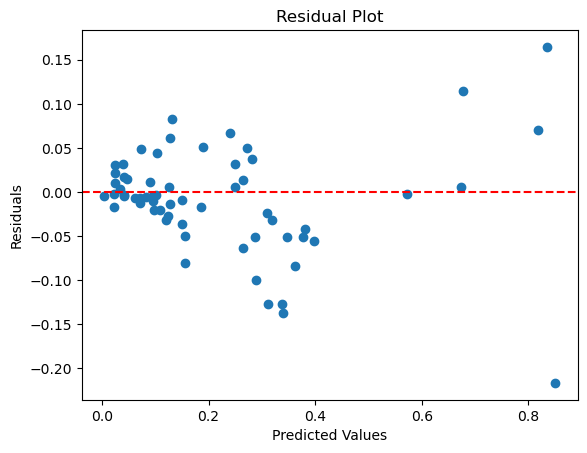

In [93]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

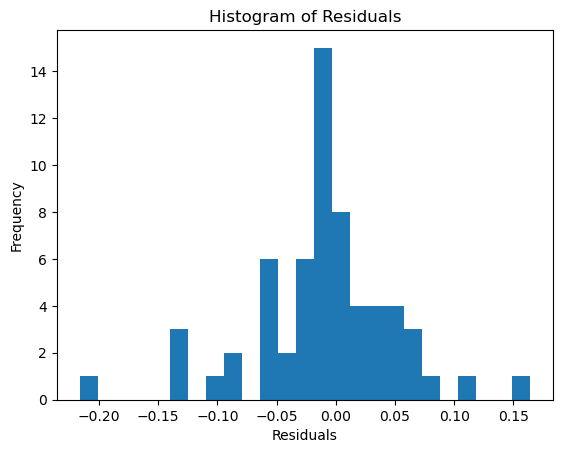

In [94]:
# Histogram plot
plt.hist(residuals, bins=25)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


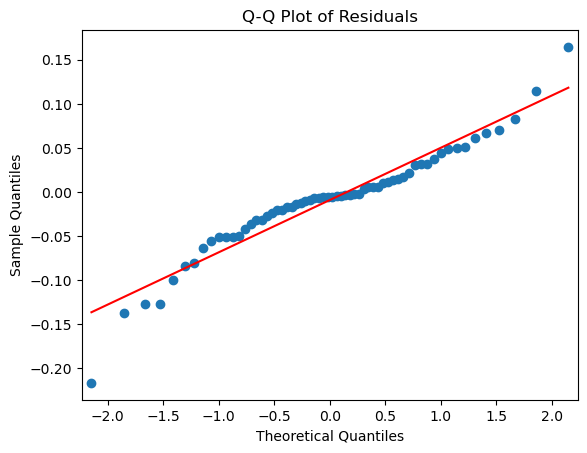

In [95]:
# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

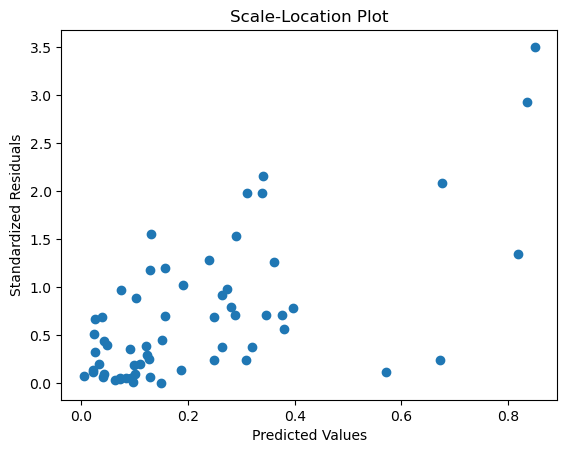

In [96]:
# Scale-Location plot
residuals_standardized = (residuals - np.mean(residuals)) / np.std(residuals)
plt.scatter(y_pred, np.abs(residuals_standardized))
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.title("Scale-Location Plot")
plt.show()

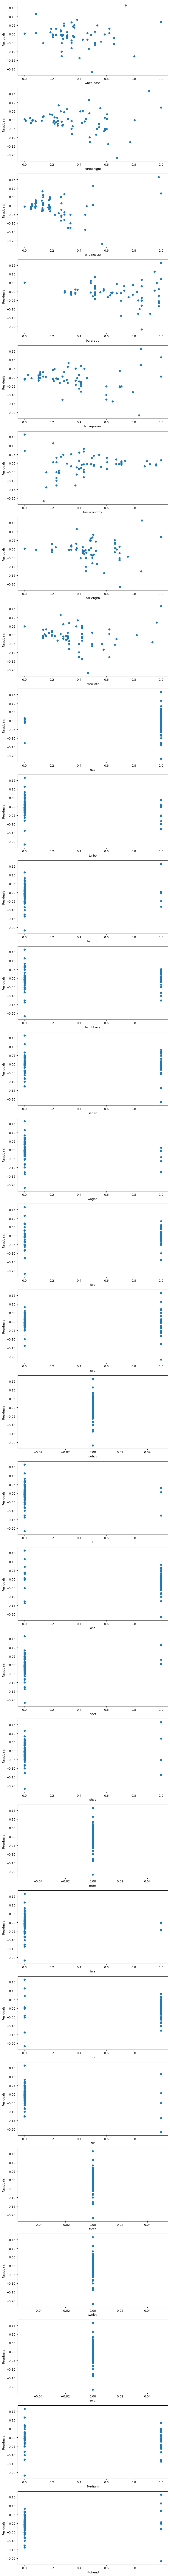

In [97]:
# Residuals vs. Predictor Variables plot
n_cols = X_test.shape[1]
fig, axs = plt.subplots(n_cols, 1, figsize=(8, 4 * n_cols))
for i, col in enumerate(X_test.columns):
    axs[i].scatter(X_test[col], residuals)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Residuals")
plt.tight_layout()
plt.show()

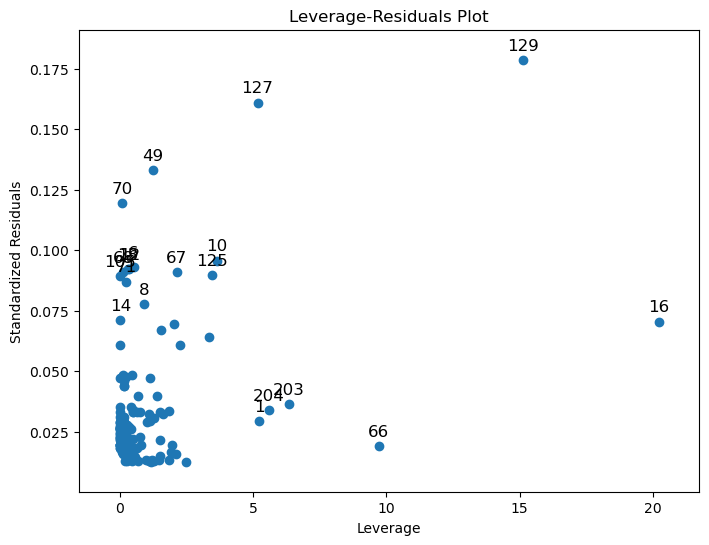

In [98]:
# Leverage-Residuals plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.plot_leverage_resid2(lm, ax=ax)
plt.xlabel("Leverage")
plt.ylabel("Standardized Residuals")
plt.title("Leverage-Residuals Plot")
plt.show()

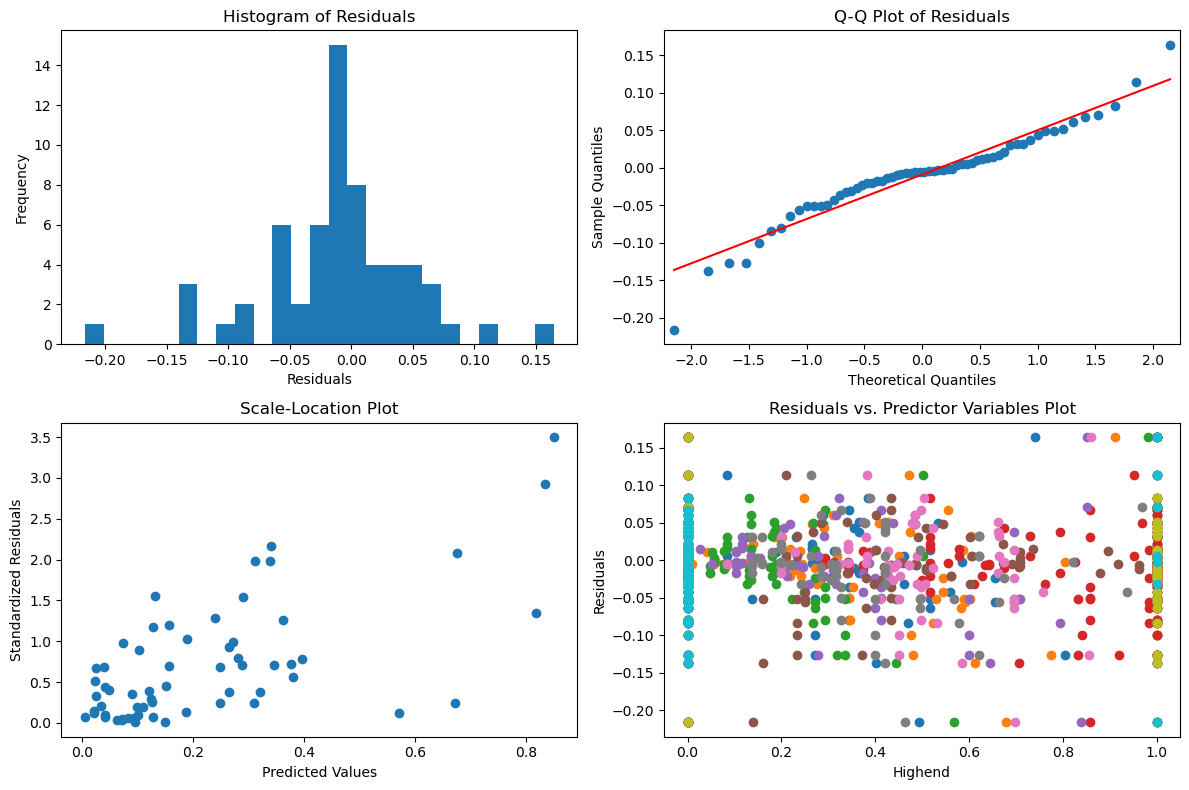

Evaluation Metrics:
Mean Squared Error (MSE): 0.0035953373597744577
Root Mean Squared Error (RMSE): 0.05996113207549085
Mean Absolute Error (MAE): 0.041164991214513495
R-squared (R2) Score: 0.9178508977295788


In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate residuals
residuals = y_test - y_pred

# Residual plot iteration
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Histogram plot
axs[0, 0].hist(residuals, bins=25)
axs[0, 0].set_xlabel("Residuals")
axs[0, 0].set_ylabel("Frequency")
axs[0, 0].set_title("Histogram of Residuals")

# Q-Q plot
sm.qqplot(residuals, line='s', ax=axs[0, 1])
axs[0, 1].set_title("Q-Q Plot of Residuals")

# Scale-Location plot
residuals_standardized = (residuals - np.mean(residuals)) / np.std(residuals)
axs[1, 0].scatter(y_pred, np.abs(residuals_standardized))
axs[1, 0].set_xlabel("Predicted Values")
axs[1, 0].set_ylabel("Standardized Residuals")
axs[1, 0].set_title("Scale-Location Plot")

# Residuals vs. Predictor Variables plot
n_cols = X_test.shape[1]
for i, col in enumerate(X_test.columns):
    axs[1, 1].scatter(X_test[col], residuals)
    axs[1, 1].set_xlabel(col)
    axs[1, 1].set_ylabel("Residuals")
axs[1, 1].set_title("Residuals vs. Predictor Variables Plot")

plt.tight_layout()
plt.show()

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


In [102]:
import pickle

# Assuming you have a trained model named 'model'
#model = xgb_model

# Save the model to a file
#with open('GridSearchCV.pkl', 'wb') as file:
#    pickle.dump(model, file)


In [103]:
# Load the saved model from file
with open('GridSearchCV.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [105]:
# Assuming you have a trained GridSearchCV model named 'grid_search' and a test dataset named 'X_test'
y_pred = grid_search.predict(X_test)
y_pred


array([0.04168688, 0.09801475, 0.09595609, 0.100959  , 0.0245142 ,
       0.10244634, 0.37694556, 0.36148608, 0.23953404, 0.34630227,
       0.30943027, 0.28101027, 0.24892835, 0.12783165, 0.818232  ,
       0.03321758, 0.04168688, 0.18657243, 0.27256837, 0.28778213,
       0.2642157 , 0.2642157 , 0.67263293, 0.02164551, 0.15631878,
       0.33970338, 0.31065676, 0.5712786 , 0.3197096 , 0.14997722,
       0.02164551, 0.8505026 , 0.33814943, 0.39686987, 0.24892835,
       0.12648477, 0.1895264 , 0.15055077, 0.04116057, 0.12055615,
       0.83551484, 0.13066821, 0.02348032, 0.08292785, 0.00460082,
       0.10956781, 0.06231555, 0.12367018, 0.0715355 , 0.09050716,
       0.02439812, 0.15631878, 0.03922035, 0.12809886, 0.38045147,
       0.04771978, 0.0937875 , 0.0937875 , 0.28926232, 0.0715355 ,
       0.07369759, 0.6763354 ], dtype=float32)

In [107]:
# Assuming you have the actual test labels named 'y_test'
# Assuming you have the predicted labels named 'y_pred'

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Compare the predicted and actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

Mean Squared Error (MSE): 0.0035953373597744577
Root Mean Squared Error (RMSE): 0.05996113207549085
Mean Absolute Error (MAE): 0.041164991214513495
R-squared (R2) Score: 0.9178508977295788
       Actual  Predicted
160  0.058474   0.041687
186  0.077398   0.098015
59   0.086148   0.095956
165  0.097473   0.100959
140  0.055099   0.024514
..        ...        ...
28   0.088048   0.093787
29   0.189120   0.289262
182  0.059399   0.071535
40   0.122397   0.073698
128  0.790705   0.676335

[62 rows x 2 columns]


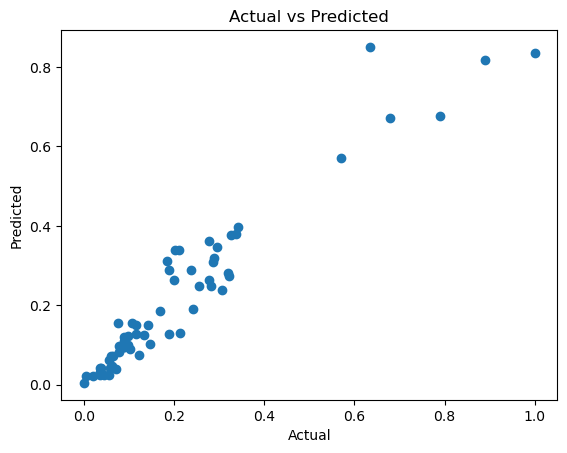

In [108]:

# Create a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [109]:
git init


SyntaxError: invalid syntax (3277417328.py, line 1)